In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import math
from tensorflow.keras.callbacks import TensorBoard

In [2]:
FF_df = pd.read_csv('form_factors_200.csv')
TD_x_df = pd.read_csv('gpr_total_density_x_200.csv')
TD_y_df = pd.read_csv('gpr_total_density_y_200.csv')
FF_df = FF_df.transpose()
TD_x_df = TD_x_df.transpose()
TD_y_df = TD_y_df.transpose()
FF_df = (FF_df-FF_df.mean())/FF_df.std()
#TD_x_df = (TD_x_df-TD_x_df.mean())/TD_x_df.std()
#TD_y_df = (TD_y_df-TD_y_df.mean())/TD_y_df.std()

In [3]:
FF_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,0.980720,-0.444256,0.186761,-0.047851,-0.354703,-0.584007,-0.183981,-0.309006,-0.349255,0.267737,...,-0.513892,-0.299718,-0.477219,0.087297,-0.142115,0.840006,-0.459976,-0.427894,0.672328,-0.105556
1,0.980030,-0.444704,0.186284,-0.048252,-0.355220,-0.584411,-0.183635,-0.309460,-0.349860,0.267305,...,-0.514353,-0.299953,-0.477644,0.086667,-0.142717,0.839384,-0.460461,-0.428323,0.671703,-0.105924
2,0.977961,-0.446046,0.184852,-0.049453,-0.356769,-0.585624,-0.182598,-0.310820,-0.351675,0.266009,...,-0.515734,-0.300657,-0.478919,0.084776,-0.144520,0.837520,-0.461915,-0.429612,0.669829,-0.107030
3,0.974512,-0.448282,0.182466,-0.051454,-0.359351,-0.587644,-0.180870,-0.313086,-0.354698,0.263851,...,-0.518037,-0.301829,-0.481043,0.081625,-0.147525,0.834413,-0.464338,-0.431758,0.666705,-0.108872
4,0.969687,-0.451412,0.179127,-0.054255,-0.362964,-0.590472,-0.178453,-0.316257,-0.358928,0.260830,...,-0.521258,-0.303470,-0.484016,0.077216,-0.151730,0.830066,-0.467729,-0.434762,0.662335,-0.111451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.637919,-0.763000,-0.775248,-0.745377,-0.664294,-0.757084,-0.752626,-0.656961,-0.656225,-0.777161,...,-0.857844,-0.764482,-0.705293,-0.861659,-0.689449,-0.738946,-0.677948,-0.761120,-0.640692,-0.750145
996,-0.637355,-0.762537,-0.774302,-0.744959,-0.665308,-0.758153,-0.751415,-0.656542,-0.659345,-0.777468,...,-0.857907,-0.765611,-0.704952,-0.862931,-0.690513,-0.738721,-0.677956,-0.760901,-0.640672,-0.749707
997,-0.636854,-0.762078,-0.773360,-0.744537,-0.666345,-0.759220,-0.750233,-0.656158,-0.662494,-0.777772,...,-0.857928,-0.766756,-0.704615,-0.864157,-0.691557,-0.738505,-0.678050,-0.760640,-0.640653,-0.749303
998,-0.636415,-0.761626,-0.772425,-0.744112,-0.667403,-0.760285,-0.749080,-0.655810,-0.665672,-0.778070,...,-0.857907,-0.767919,-0.704282,-0.865337,-0.692583,-0.738300,-0.678230,-0.760337,-0.640635,-0.748932


In [4]:
TD_x_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,-4.006749,-4.188136,-3.638160,-3.894873,-3.844019,-3.809503,-3.165183,-3.245228,-4.062528,-3.633562,...,-3.877194,-2.436400,-4.331613,-4.054178,-5.556947,-4.426408,-3.773735,-4.070915,-4.221646,-3.532301
1,-3.966481,-4.146044,-3.601596,-3.855728,-3.805385,-3.771216,-3.133372,-3.212612,-4.021698,-3.597043,...,-3.838227,-2.411913,-4.288079,-4.013432,-5.501099,-4.381922,-3.735808,-4.030001,-4.179217,-3.496800
2,-3.926212,-4.103952,-3.565031,-3.816584,-3.766752,-3.732930,-3.101561,-3.179997,-3.980869,-3.560525,...,-3.799260,-2.387427,-4.244546,-3.972687,-5.445250,-4.337435,-3.697881,-3.989087,-4.136789,-3.461300
3,-3.885943,-4.061860,-3.528467,-3.777440,-3.728119,-3.694643,-3.069750,-3.147382,-3.940039,-3.524007,...,-3.760293,-2.362941,-4.201012,-3.931941,-5.389401,-4.292949,-3.659954,-3.948174,-4.094360,-3.425799
4,-3.845674,-4.019768,-3.491902,-3.738295,-3.689485,-3.656357,-3.037939,-3.114766,-3.899210,-3.487489,...,-3.721327,-2.338454,-4.157478,-3.891196,-5.333552,-4.248462,-3.622027,-3.907260,-4.051931,-3.390299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3.845674,4.019768,3.491902,3.738295,3.689485,3.656357,3.037939,3.114766,3.899210,3.487489,...,3.721327,2.338454,4.157478,3.891196,5.333552,4.248462,3.622027,3.907260,4.051931,3.390299
196,3.885943,4.061860,3.528467,3.777440,3.728119,3.694643,3.069750,3.147382,3.940039,3.524007,...,3.760293,2.362941,4.201012,3.931941,5.389401,4.292949,3.659954,3.948174,4.094360,3.425799
197,3.926212,4.103952,3.565031,3.816584,3.766752,3.732930,3.101561,3.179997,3.980869,3.560525,...,3.799260,2.387427,4.244546,3.972687,5.445250,4.337435,3.697881,3.989087,4.136789,3.461300
198,3.966481,4.146044,3.601596,3.855728,3.805385,3.771216,3.133372,3.212612,4.021698,3.597043,...,3.838227,2.411913,4.288079,4.013432,5.501099,4.381922,3.735808,4.030001,4.179217,3.496800


In [5]:
TD_y_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,333.204244,334.485664,340.298044,334.684611,332.848038,336.100431,351.842860,330.512511,337.266229,332.624183,...,329.131857,328.493013,338.053097,332.910187,336.384540,330.493742,328.922594,330.865940,329.636917,322.430402
1,333.566343,334.232327,340.249833,334.350987,333.289027,335.519065,350.935144,330.516524,337.318158,332.727117,...,329.797640,328.747349,338.117668,332.806640,336.822260,330.482033,329.448368,331.141939,329.756934,324.831431
2,333.731060,333.956931,340.185331,334.168397,333.446321,335.208764,350.600132,330.427115,337.477778,332.762805,...,329.878943,328.742041,338.130676,332.756829,336.838387,330.462405,329.307910,331.286935,329.805601,326.176001
3,333.822123,333.782696,340.138090,334.099749,333.444878,335.105242,350.630093,330.351033,337.613346,332.764355,...,329.660162,328.538288,338.120790,332.805368,336.754824,330.455435,328.968759,331.357395,329.813347,326.721055
4,333.888462,333.739810,340.116558,334.106518,333.372566,335.141254,350.836216,330.334379,337.668212,332.753040,...,329.388288,328.196835,338.105252,332.922401,336.719547,330.466258,328.711676,331.378835,329.802678,326.715502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,333.778670,333.763426,340.186997,334.106887,333.289838,334.898850,350.553593,330.263046,337.618389,332.786905,...,329.196610,328.563470,338.087262,332.971975,336.809905,330.430037,329.568313,331.244414,329.786218,325.799012
196,333.729730,333.840736,340.251529,334.089817,333.339024,334.943515,350.389940,330.073637,337.514903,332.809683,...,329.381779,328.876883,338.073907,333.016986,336.999441,330.449168,329.557337,330.907225,329.802986,325.998720
197,333.669431,333.876643,340.287847,334.036981,333.398144,335.151591,350.177928,329.998734,337.359402,332.809623,...,329.401901,329.035338,338.069590,333.048410,337.091830,330.465254,329.381783,330.670172,329.805961,326.142870
198,333.544270,333.788974,340.219963,333.938143,333.428262,335.595932,349.928119,330.150935,337.176497,332.769615,...,329.039184,328.946697,338.087988,332.961431,336.840729,330.450025,328.951252,330.704654,329.773324,326.133732


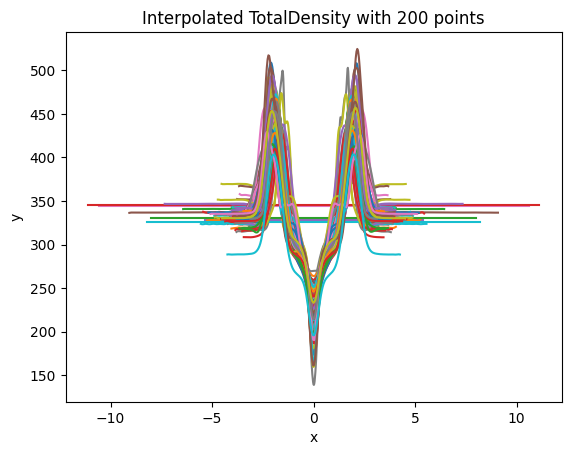

In [6]:
for index in range(0,200):
    plt.plot(TD_x_df[index],TD_y_df[index])
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity with 200 points')
plt.show()

In [7]:
names = []
for i in range(0,613):
    names.append(str(i) + 'x')
    names.append(str(i) + 'y')

TD_df = pd.DataFrame(index=range(200),columns=[names])

for i in range(0,613):
    x_value = []
    y_value = []
    for value in TD_x_df[i]:
        x_value.append(value)
    for value in TD_y_df[i]:
        y_value.append(value)
    
    TD_df[str(i) + 'x'] = x_value
    TD_df[str(i) + 'y'] = y_value
    
TD_df

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,608x,608y,609x,609y,610x,610y,611x,611y,612x,612y
0,-4.006749,333.204244,-4.188136,334.485664,-3.638160,340.298044,-3.894873,334.684611,-3.844019,332.848038,...,-4.426408,330.493742,-3.773735,328.922594,-4.070915,330.865940,-4.221646,329.636917,-3.532301,322.430402
1,-3.966481,333.566343,-4.146044,334.232327,-3.601596,340.249833,-3.855728,334.350987,-3.805385,333.289027,...,-4.381922,330.482033,-3.735808,329.448368,-4.030001,331.141939,-4.179217,329.756934,-3.496800,324.831431
2,-3.926212,333.731060,-4.103952,333.956931,-3.565031,340.185331,-3.816584,334.168397,-3.766752,333.446321,...,-4.337435,330.462405,-3.697881,329.307910,-3.989087,331.286935,-4.136789,329.805601,-3.461300,326.176001
3,-3.885943,333.822123,-4.061860,333.782696,-3.528467,340.138090,-3.777440,334.099749,-3.728119,333.444878,...,-4.292949,330.455435,-3.659954,328.968759,-3.948174,331.357395,-4.094360,329.813347,-3.425799,326.721055
4,-3.845674,333.888462,-4.019768,333.739810,-3.491902,340.116558,-3.738295,334.106518,-3.689485,333.372566,...,-4.248462,330.466258,-3.622027,328.711676,-3.907260,331.378835,-4.051931,329.802678,-3.390299,326.715502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3.845674,333.778670,4.019768,333.763426,3.491902,340.186997,3.738295,334.106887,3.689485,333.289838,...,4.248462,330.430037,3.622027,329.568313,3.907260,331.244414,4.051931,329.786218,3.390299,325.799012
196,3.885943,333.729730,4.061860,333.840736,3.528467,340.251529,3.777440,334.089817,3.728119,333.339024,...,4.292949,330.449168,3.659954,329.557337,3.948174,330.907225,4.094360,329.802986,3.425799,325.998720
197,3.926212,333.669431,4.103952,333.876643,3.565031,340.287847,3.816584,334.036981,3.766752,333.398144,...,4.337435,330.465254,3.697881,329.381783,3.989087,330.670172,4.136789,329.805961,3.461300,326.142870
198,3.966481,333.544270,4.146044,333.788974,3.601596,340.219963,3.855728,333.938143,3.805385,333.428262,...,4.381922,330.450025,3.735808,328.951252,4.030001,330.704654,4.179217,329.773324,3.496800,326.133732


In [8]:
input_data = FF_df.iloc[: , :-3]
output_data = TD_df.iloc[: , :-6]

In [9]:
input_data

,0,1,2,3,4,5,6,7,8,9,...,600,601,602,603,604,605,606,607,608,609
0,0.980720,-0.444256,0.186761,-0.047851,-0.354703,-0.584007,-0.183981,-0.309006,-0.349255,0.267737,...,-0.015755,-0.670520,-0.250014,-0.513892,-0.299718,-0.477219,0.087297,-0.142115,0.840006,-0.459976
1,0.980030,-0.444704,0.186284,-0.048252,-0.355220,-0.584411,-0.183635,-0.309460,-0.349860,0.267305,...,-0.016233,-0.670950,-0.250566,-0.514353,-0.299953,-0.477644,0.086667,-0.142717,0.839384,-0.460461
2,0.977961,-0.446046,0.184852,-0.049453,-0.356769,-0.585624,-0.182598,-0.310820,-0.351675,0.266009,...,-0.017669,-0.672240,-0.252221,-0.515734,-0.300657,-0.478919,0.084776,-0.144520,0.837520,-0.461915
3,0.974512,-0.448282,0.182466,-0.051454,-0.359351,-0.587644,-0.180870,-0.313086,-0.354698,0.263851,...,-0.020061,-0.674390,-0.254978,-0.518037,-0.301829,-0.481043,0.081625,-0.147525,0.834413,-0.464338
4,0.969687,-0.451412,0.179127,-0.054255,-0.362964,-0.590472,-0.178453,-0.316257,-0.358928,0.260830,...,-0.023408,-0.677398,-0.258837,-0.521258,-0.303470,-0.484016,0.077216,-0.151730,0.830066,-0.467729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.637919,-0.763000,-0.775248,-0.745377,-0.664294,-0.757084,-0.752626,-0.656961,-0.656225,-0.777161,...,-0.765111,-0.743381,-0.669381,-0.857844,-0.764482,-0.705293,-0.861659,-0.689449,-0.738946,-0.677948
996,-0.637355,-0.762537,-0.774302,-0.744959,-0.665308,-0.758153,-0.751415,-0.656542,-0.659345,-0.777468,...,-0.765019,-0.743575,-0.669735,-0.857907,-0.765611,-0.704952,-0.862931,-0.690513,-0.738721,-0.677956
997,-0.636854,-0.762078,-0.773360,-0.744537,-0.666345,-0.759220,-0.750233,-0.656158,-0.662494,-0.777772,...,-0.764926,-0.743771,-0.670089,-0.857928,-0.766756,-0.704615,-0.864157,-0.691557,-0.738505,-0.678050
998,-0.636415,-0.761626,-0.772425,-0.744112,-0.667403,-0.760285,-0.749080,-0.655810,-0.665672,-0.778070,...,-0.764833,-0.743970,-0.670442,-0.857907,-0.767919,-0.704282,-0.865337,-0.692583,-0.738300,-0.678230


In [40]:
output_data

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,605x,605y,606x,606y,607x,607y,608x,608y,609x,609y
0,-4.006749,333.204244,-4.188136,334.485664,-3.638160,340.298044,-3.894873,334.684611,-3.844019,332.848038,...,-4.331613,338.053097,-4.054178,332.910187,-5.556947,336.384540,-4.426408,330.493742,-3.773735,328.922594
1,-3.966481,333.566343,-4.146044,334.232327,-3.601596,340.249833,-3.855728,334.350987,-3.805385,333.289027,...,-4.288079,338.117668,-4.013432,332.806640,-5.501099,336.822260,-4.381922,330.482033,-3.735808,329.448368
2,-3.926212,333.731060,-4.103952,333.956931,-3.565031,340.185331,-3.816584,334.168397,-3.766752,333.446321,...,-4.244546,338.130676,-3.972687,332.756829,-5.445250,336.838387,-4.337435,330.462405,-3.697881,329.307910
3,-3.885943,333.822123,-4.061860,333.782696,-3.528467,340.138090,-3.777440,334.099749,-3.728119,333.444878,...,-4.201012,338.120790,-3.931941,332.805368,-5.389401,336.754824,-4.292949,330.455435,-3.659954,328.968759
4,-3.845674,333.888462,-4.019768,333.739810,-3.491902,340.116558,-3.738295,334.106518,-3.689485,333.372566,...,-4.157478,338.105252,-3.891196,332.922401,-5.333552,336.719547,-4.248462,330.466258,-3.622027,328.711676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3.845674,333.778670,4.019768,333.763426,3.491902,340.186997,3.738295,334.106887,3.689485,333.289838,...,4.157478,338.087262,3.891196,332.971975,5.333552,336.809905,4.248462,330.430037,3.622027,329.568313
196,3.885943,333.729730,4.061860,333.840736,3.528467,340.251529,3.777440,334.089817,3.728119,333.339024,...,4.201012,338.073907,3.931941,333.016986,5.389401,336.999441,4.292949,330.449168,3.659954,329.557337
197,3.926212,333.669431,4.103952,333.876643,3.565031,340.287847,3.816584,334.036981,3.766752,333.398144,...,4.244546,338.069590,3.972687,333.048410,5.445250,337.091830,4.337435,330.465254,3.697881,329.381783
198,3.966481,333.544270,4.146044,333.788974,3.601596,340.219963,3.855728,333.938143,3.805385,333.428262,...,4.288079,338.087988,4.013432,332.961431,5.501099,336.840729,4.381922,330.450025,3.735808,328.951252


In [10]:
column_index = []
for i in input_data.columns:
    column_index.append(i)

random.seed(42)
train = random.sample(column_index,488)
test = []
for number in column_index:
    if not number in train:
        test.append(number)

print(train)
print(test)

[114, 25, 281, 250, 228, 142, 104, 558, 89, 432, 32, 30, 95, 223, 238, 517, 27, 574, 203, 602, 429, 225, 459, 284, 6, 163, 600, 348, 586, 159, 220, 344, 603, 94, 389, 99, 367, 352, 270, 44, 470, 549, 127, 387, 80, 300, 370, 196, 71, 46, 233, 296, 81, 595, 103, 575, 581, 464, 373, 166, 379, 363, 214, 273, 73, 175, 606, 167, 473, 388, 276, 224, 332, 57, 234, 599, 323, 410, 274, 67, 216, 322, 217, 511, 405, 469, 146, 271, 604, 252, 269, 438, 408, 563, 538, 141, 505, 93, 48, 440, 56, 78, 321, 557, 525, 582, 529, 305, 534, 197, 195, 502, 239, 571, 128, 283, 510, 482, 5, 504, 369, 58, 349, 453, 531, 384, 136, 393, 328, 174, 536, 150, 222, 565, 232, 1, 489, 448, 368, 134, 256, 390, 91, 259, 54, 445, 320, 152, 430, 327, 466, 311, 101, 508, 191, 468, 82, 539, 398, 522, 0, 306, 165, 543, 9, 479, 185, 425, 413, 157, 122, 29, 123, 290, 40, 43, 374, 248, 417, 35, 554, 272, 392, 64, 65, 337, 243, 607, 84, 135, 496, 310, 503, 108, 452, 386, 551, 353, 102, 365, 580, 204, 343, 537, 455, 515, 264, 231, 

In [11]:
train_input_values = []
for number in train:
    train_input_values.append(input_data[number])
    
train_output_values = []
for number in train:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    train_output_values.append(np.concatenate((list_1,list_2)))

test_input_values = []
for number in test:
    test_input_values.append(input_data[number])
    
test_output_values = []
for number in test:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    test_output_values.append(np.concatenate((list_1,list_2)))
    
train_input_values = np.array(train_input_values).astype(np.float32)
train_output_values = np.array(train_output_values).astype(np.float32)
test_input_values = np.array(test_input_values).astype(np.float32)
test_output_values = np.array(test_output_values).astype(np.float32)

In [12]:
print(train_input_values.shape)
print(train_output_values.shape)
print(test_input_values.shape)
print(test_output_values.shape)

(488, 1000)
(488, 400, 1)
(122, 1000)
(122, 400, 1)


In [13]:
def MSE(actual,prediction):
    length = int(len(prediction[0])/2)
    
    index = 0
    distance_average_sum = 0
    for data in prediction:
        p_x = data[0:length]
        p_y = data[length:]
        t_x = actual[index][0:length]
        t_y = actual[index][length:]

        distance_sum = 0
        for i in range(0,length):
            distance_sum = distance_sum + math.sqrt((t_x[i]-p_x[i])**2 + (t_y[i]-p_y[i])**2)

        distance_average_sum = distance_average_sum + distance_sum/length

    return distance_average_sum/len(prediction)

def Plots(actual,prediction):
    length = int(len(prediction[0])/2)
    
    prediction = model.predict(test_input_values)
    x_1 = prediction[0][0:length]
    y_1 = prediction[0][length:]
    plt.plot(x_1,y_1,c='b')

    x_2 = test_output_values[0][0:length]
    y_2 = test_output_values[0][length:]
    plt.plot(x_2,y_2,c='r')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of the first prediction = blue and actual = red')
    plt.show()
    
    index = 0
    for points in prediction:
        p_x = points[0:length]
        p_y = points[length:]
        plt.scatter(p_x,p_y,c='b', label='Prediction', alpha=0.25)
        t_x = test_output_values[index][0:length].tolist()
        t_y = test_output_values[index][length:].tolist()
        plt.scatter(t_x,t_y,c='r', label = 'Actual', alpha=0.50)
        index = index + 1

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output scatterplot of prediction = blue and actual = red data')
    plt.show()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense (Dense)               (None, 2000)              2002000   
                                                                 
 dense_1 (Dense)             (None, 2000)              4002000   
                                                                 
 dense_2 (Dense)             (None, 1000)              2001000   
                                                                 
 dense_3 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_4 (Dense)             (None, 400)               400400    
                                                                 
Total params: 9,406,400
Trainable params: 9,406,400
Non-train

7/7 [==============================] - 2s 266ms/step - loss: 313.6134 - val_loss: 241.7436
Epoch 68/1250
7/7 [==============================] - 2s 238ms/step - loss: 302.5226 - val_loss: 246.4599
Epoch 69/1250
7/7 [==============================] - 2s 234ms/step - loss: 298.9543 - val_loss: 239.2254
Epoch 70/1250
7/7 [==============================] - 1s 205ms/step - loss: 296.8969 - val_loss: 244.8980
Epoch 71/1250
7/7 [==============================] - 2s 239ms/step - loss: 296.8168 - val_loss: 238.4063
Epoch 72/1250
7/7 [==============================] - 1s 202ms/step - loss: 292.0742 - val_loss: 239.6582
Epoch 73/1250
7/7 [==============================] - 1s 203ms/step - loss: 292.6305 - val_loss: 230.1634
Epoch 74/1250
7/7 [==============================] - 1s 209ms/step - loss: 288.5226 - val_loss: 229.6656
Epoch 75/1250
7/7 [==============================] - 2s 236ms/step - loss: 287.4253 - val_loss: 243.8992
Epoch 76/1250
7/7 [==============================] - 1s 204ms/step - 

7/7 [==============================] - 1s 167ms/step - loss: 262.3727 - val_loss: 219.5676
Epoch 145/1250
7/7 [==============================] - 1s 167ms/step - loss: 253.6136 - val_loss: 213.9118
Epoch 146/1250
7/7 [==============================] - 1s 169ms/step - loss: 251.1121 - val_loss: 301.0406
Epoch 147/1250
7/7 [==============================] - 1s 167ms/step - loss: 268.5286 - val_loss: 317.1892
Epoch 148/1250
7/7 [==============================] - 1s 166ms/step - loss: 293.1440 - val_loss: 254.7289
Epoch 149/1250
7/7 [==============================] - 1s 165ms/step - loss: 254.2778 - val_loss: 230.4808
Epoch 150/1250
7/7 [==============================] - 1s 169ms/step - loss: 246.4152 - val_loss: 212.4970
Epoch 151/1250
7/7 [==============================] - 1s 172ms/step - loss: 248.8480 - val_loss: 203.3516
Epoch 152/1250
7/7 [==============================] - 1s 171ms/step - loss: 235.5874 - val_loss: 225.1106
Epoch 153/1250
7/7 [==============================] - 1s 165m

7/7 [==============================] - 1s 166ms/step - loss: 260.7646 - val_loss: 304.2094
Epoch 222/1250
7/7 [==============================] - 1s 175ms/step - loss: 297.4950 - val_loss: 375.0516
Epoch 223/1250
7/7 [==============================] - 1s 169ms/step - loss: 316.3365 - val_loss: 214.5074
Epoch 224/1250
7/7 [==============================] - 1s 166ms/step - loss: 302.4803 - val_loss: 221.5362
Epoch 225/1250
7/7 [==============================] - 1s 168ms/step - loss: 298.1366 - val_loss: 232.6119
Epoch 226/1250
7/7 [==============================] - 1s 165ms/step - loss: 309.7436 - val_loss: 352.9599
Epoch 227/1250
7/7 [==============================] - 1s 169ms/step - loss: 322.4012 - val_loss: 254.6088
Epoch 228/1250
7/7 [==============================] - 1s 171ms/step - loss: 278.5693 - val_loss: 225.0400
Epoch 229/1250
7/7 [==============================] - 1s 165ms/step - loss: 251.9797 - val_loss: 195.3282
Epoch 230/1250
7/7 [==============================] - 1s 173m

7/7 [==============================] - 1s 175ms/step - loss: 271.3057 - val_loss: 246.2668
Epoch 299/1250
7/7 [==============================] - 1s 168ms/step - loss: 238.9027 - val_loss: 227.7086
Epoch 300/1250
7/7 [==============================] - 1s 169ms/step - loss: 215.4860 - val_loss: 218.6967
Epoch 301/1250
7/7 [==============================] - 1s 165ms/step - loss: 233.1098 - val_loss: 212.1121
Epoch 302/1250
7/7 [==============================] - 1s 177ms/step - loss: 215.6523 - val_loss: 164.3082
Epoch 303/1250
7/7 [==============================] - 1s 166ms/step - loss: 203.8445 - val_loss: 210.4576
Epoch 304/1250
7/7 [==============================] - 1s 165ms/step - loss: 216.7282 - val_loss: 219.3619
Epoch 305/1250
7/7 [==============================] - 1s 166ms/step - loss: 204.8017 - val_loss: 219.0747
Epoch 306/1250
7/7 [==============================] - 1s 173ms/step - loss: 220.4935 - val_loss: 197.5351
Epoch 307/1250
7/7 [==============================] - 1s 165m

7/7 [==============================] - 2s 264ms/step - loss: 230.3381 - val_loss: 178.6869
Epoch 376/1250
7/7 [==============================] - 2s 257ms/step - loss: 183.2145 - val_loss: 160.7053
Epoch 377/1250
7/7 [==============================] - 2s 261ms/step - loss: 173.7154 - val_loss: 166.3766
Epoch 378/1250
7/7 [==============================] - 2s 243ms/step - loss: 183.3304 - val_loss: 178.0763
Epoch 379/1250
7/7 [==============================] - 1s 178ms/step - loss: 182.0167 - val_loss: 170.9960
Epoch 380/1250
7/7 [==============================] - 1s 177ms/step - loss: 171.6125 - val_loss: 174.7672
Epoch 381/1250
7/7 [==============================] - 1s 189ms/step - loss: 175.1951 - val_loss: 265.7659
Epoch 382/1250
7/7 [==============================] - 1s 183ms/step - loss: 191.1850 - val_loss: 194.4559
Epoch 383/1250
7/7 [==============================] - 1s 177ms/step - loss: 189.5654 - val_loss: 187.6692
Epoch 384/1250
7/7 [==============================] - 1s 183m

7/7 [==============================] - 1s 153ms/step - loss: 175.8261 - val_loss: 173.8124
Epoch 453/1250
7/7 [==============================] - 1s 148ms/step - loss: 158.1699 - val_loss: 183.1541
Epoch 454/1250
7/7 [==============================] - 1s 148ms/step - loss: 172.4432 - val_loss: 157.0303
Epoch 455/1250
7/7 [==============================] - 1s 160ms/step - loss: 167.9995 - val_loss: 247.5645
Epoch 456/1250
7/7 [==============================] - 1s 150ms/step - loss: 195.1363 - val_loss: 200.0649
Epoch 457/1250
7/7 [==============================] - 1s 156ms/step - loss: 186.8581 - val_loss: 220.0681
Epoch 458/1250
7/7 [==============================] - 1s 150ms/step - loss: 172.9625 - val_loss: 178.0567
Epoch 459/1250
7/7 [==============================] - 1s 147ms/step - loss: 183.4803 - val_loss: 233.2490
Epoch 460/1250
7/7 [==============================] - 1s 148ms/step - loss: 205.4268 - val_loss: 157.1597
Epoch 461/1250
7/7 [==============================] - 1s 149m

7/7 [==============================] - 1s 149ms/step - loss: 179.6861 - val_loss: 163.3796
Epoch 530/1250
7/7 [==============================] - 1s 149ms/step - loss: 167.1810 - val_loss: 165.0851
Epoch 531/1250
7/7 [==============================] - 1s 151ms/step - loss: 169.8546 - val_loss: 208.6977
Epoch 532/1250
7/7 [==============================] - 1s 157ms/step - loss: 173.2592 - val_loss: 188.2046
Epoch 533/1250
7/7 [==============================] - 1s 149ms/step - loss: 154.7072 - val_loss: 213.3327
Epoch 534/1250
7/7 [==============================] - 1s 151ms/step - loss: 156.3666 - val_loss: 149.7459
Epoch 535/1250
7/7 [==============================] - 1s 148ms/step - loss: 133.4475 - val_loss: 167.2699
Epoch 536/1250
7/7 [==============================] - 1s 159ms/step - loss: 136.5286 - val_loss: 166.1246
Epoch 537/1250
7/7 [==============================] - 1s 148ms/step - loss: 139.4057 - val_loss: 209.6234
Epoch 538/1250
7/7 [==============================] - 1s 153m

7/7 [==============================] - 1s 151ms/step - loss: 134.2061 - val_loss: 145.1224
Epoch 607/1250
7/7 [==============================] - 1s 148ms/step - loss: 127.5266 - val_loss: 159.8908
Epoch 608/1250
7/7 [==============================] - 1s 150ms/step - loss: 151.2682 - val_loss: 208.7539
Epoch 609/1250
7/7 [==============================] - 1s 148ms/step - loss: 149.6413 - val_loss: 173.1941
Epoch 610/1250
7/7 [==============================] - 1s 148ms/step - loss: 131.7448 - val_loss: 173.1048
Epoch 611/1250
7/7 [==============================] - 1s 151ms/step - loss: 132.8158 - val_loss: 161.6187
Epoch 612/1250
7/7 [==============================] - 1s 160ms/step - loss: 118.2249 - val_loss: 166.4387
Epoch 613/1250
7/7 [==============================] - 1s 149ms/step - loss: 134.2957 - val_loss: 244.6379
Epoch 614/1250
7/7 [==============================] - 1s 148ms/step - loss: 165.1802 - val_loss: 213.1495
Epoch 615/1250
7/7 [==============================] - 1s 153m

7/7 [==============================] - 1s 167ms/step - loss: 139.8255 - val_loss: 172.1385
Epoch 684/1250
7/7 [==============================] - 1s 152ms/step - loss: 134.9118 - val_loss: 156.0518
Epoch 685/1250
7/7 [==============================] - 1s 155ms/step - loss: 131.7004 - val_loss: 165.6720
Epoch 686/1250
7/7 [==============================] - 1s 149ms/step - loss: 123.7053 - val_loss: 150.1484
Epoch 687/1250
7/7 [==============================] - 1s 151ms/step - loss: 110.2225 - val_loss: 184.3777
Epoch 688/1250
7/7 [==============================] - 1s 149ms/step - loss: 110.0247 - val_loss: 174.3359
Epoch 689/1250
7/7 [==============================] - 1s 151ms/step - loss: 101.8687 - val_loss: 165.0124
Epoch 690/1250
7/7 [==============================] - 1s 158ms/step - loss: 100.9787 - val_loss: 163.2662
Epoch 691/1250
7/7 [==============================] - 1s 150ms/step - loss: 106.1526 - val_loss: 148.4899
Epoch 692/1250
7/7 [==============================] - 1s 151m

7/7 [==============================] - 1s 148ms/step - loss: 107.3223 - val_loss: 156.0978
Epoch 761/1250
7/7 [==============================] - 1s 152ms/step - loss: 106.7575 - val_loss: 162.0283
Epoch 762/1250
7/7 [==============================] - 1s 150ms/step - loss: 102.8261 - val_loss: 165.4478
Epoch 763/1250
7/7 [==============================] - 1s 156ms/step - loss: 101.8015 - val_loss: 170.9513
Epoch 764/1250
7/7 [==============================] - 1s 152ms/step - loss: 104.2387 - val_loss: 160.3982
Epoch 765/1250
7/7 [==============================] - 1s 153ms/step - loss: 107.3849 - val_loss: 153.0634
Epoch 766/1250
7/7 [==============================] - 1s 151ms/step - loss: 117.4831 - val_loss: 194.7473
Epoch 767/1250
7/7 [==============================] - 1s 150ms/step - loss: 107.5346 - val_loss: 225.4591
Epoch 768/1250
7/7 [==============================] - 1s 155ms/step - loss: 117.4364 - val_loss: 171.2378
Epoch 769/1250
7/7 [==============================] - 1s 167m

Epoch 838/1250
7/7 [==============================] - 2s 224ms/step - loss: 101.6969 - val_loss: 165.5175
Epoch 839/1250
7/7 [==============================] - 2s 233ms/step - loss: 138.7555 - val_loss: 223.1592
Epoch 840/1250
7/7 [==============================] - 1s 168ms/step - loss: 129.1252 - val_loss: 153.5247
Epoch 841/1250
7/7 [==============================] - 1s 155ms/step - loss: 113.9966 - val_loss: 155.9778
Epoch 842/1250
7/7 [==============================] - 1s 159ms/step - loss: 100.6318 - val_loss: 177.8828
Epoch 843/1250
7/7 [==============================] - 1s 151ms/step - loss: 102.7743 - val_loss: 197.0221
Epoch 844/1250
7/7 [==============================] - 1s 152ms/step - loss: 114.6382 - val_loss: 260.9357
Epoch 845/1250
7/7 [==============================] - 1s 152ms/step - loss: 148.2944 - val_loss: 191.8479
Epoch 846/1250
7/7 [==============================] - 1s 151ms/step - loss: 137.5179 - val_loss: 169.5476
Epoch 847/1250
7/7 [==========================

Epoch 916/1250
7/7 [==============================] - 1s 147ms/step - loss: 66.1131 - val_loss: 134.9412
Epoch 917/1250
7/7 [==============================] - 1s 148ms/step - loss: 61.5351 - val_loss: 140.1883
Epoch 918/1250
7/7 [==============================] - 1s 147ms/step - loss: 61.9180 - val_loss: 172.4512
Epoch 919/1250
7/7 [==============================] - 1s 149ms/step - loss: 73.4777 - val_loss: 155.2574
Epoch 920/1250
7/7 [==============================] - 1s 148ms/step - loss: 61.9706 - val_loss: 130.9102
Epoch 921/1250
7/7 [==============================] - 1s 158ms/step - loss: 53.8158 - val_loss: 146.7478
Epoch 922/1250
7/7 [==============================] - 1s 149ms/step - loss: 64.2660 - val_loss: 163.3259
Epoch 923/1250
7/7 [==============================] - 1s 148ms/step - loss: 68.1544 - val_loss: 147.5932
Epoch 924/1250
7/7 [==============================] - 1s 151ms/step - loss: 58.5755 - val_loss: 141.2344
Epoch 925/1250
7/7 [==============================] - 1

7/7 [==============================] - 1s 149ms/step - loss: 104.8932 - val_loss: 164.0908
Epoch 995/1250
7/7 [==============================] - 1s 148ms/step - loss: 101.7831 - val_loss: 162.0249
Epoch 996/1250
7/7 [==============================] - 1s 150ms/step - loss: 84.1842 - val_loss: 165.6193
Epoch 997/1250
7/7 [==============================] - 1s 147ms/step - loss: 85.3853 - val_loss: 149.9150
Epoch 998/1250
7/7 [==============================] - 1s 147ms/step - loss: 63.8790 - val_loss: 169.2055
Epoch 999/1250
7/7 [==============================] - 1s 151ms/step - loss: 72.9564 - val_loss: 197.2305
Epoch 1000/1250
7/7 [==============================] - 1s 153ms/step - loss: 80.2200 - val_loss: 167.0481
Epoch 1001/1250
7/7 [==============================] - 1s 151ms/step - loss: 62.9645 - val_loss: 146.8775
Epoch 1002/1250
7/7 [==============================] - 1s 149ms/step - loss: 47.6477 - val_loss: 155.1945
Epoch 1003/1250
7/7 [==============================] - 1s 149ms/s

7/7 [==============================] - 1s 175ms/step - loss: 54.1861 - val_loss: 139.0750
Epoch 1072/1250
7/7 [==============================] - 1s 165ms/step - loss: 50.8251 - val_loss: 157.7527
Epoch 1073/1250
7/7 [==============================] - 1s 167ms/step - loss: 54.0951 - val_loss: 161.6998
Epoch 1074/1250
7/7 [==============================] - 1s 175ms/step - loss: 59.3564 - val_loss: 215.6785
Epoch 1075/1250
7/7 [==============================] - 1s 165ms/step - loss: 69.0161 - val_loss: 184.9470
Epoch 1076/1250
7/7 [==============================] - 1s 166ms/step - loss: 56.9441 - val_loss: 189.8271
Epoch 1077/1250
7/7 [==============================] - 1s 167ms/step - loss: 71.9145 - val_loss: 202.7678
Epoch 1078/1250
7/7 [==============================] - 1s 168ms/step - loss: 60.6972 - val_loss: 196.7347
Epoch 1079/1250
7/7 [==============================] - 1s 167ms/step - loss: 61.9656 - val_loss: 144.8471
Epoch 1080/1250
7/7 [==============================] - 1s 176m

7/7 [==============================] - 1s 166ms/step - loss: 41.8175 - val_loss: 144.0684
Epoch 1149/1250
7/7 [==============================] - 1s 166ms/step - loss: 50.2679 - val_loss: 143.4882
Epoch 1150/1250
7/7 [==============================] - 1s 165ms/step - loss: 45.0004 - val_loss: 179.6886
Epoch 1151/1250
7/7 [==============================] - 1s 174ms/step - loss: 56.3544 - val_loss: 161.7255
Epoch 1152/1250
7/7 [==============================] - 1s 169ms/step - loss: 58.3133 - val_loss: 220.5829
Epoch 1153/1250
7/7 [==============================] - 1s 167ms/step - loss: 89.0362 - val_loss: 223.6755
Epoch 1154/1250
7/7 [==============================] - 1s 191ms/step - loss: 127.2184 - val_loss: 163.7040
Epoch 1155/1250
7/7 [==============================] - 2s 241ms/step - loss: 90.1030 - val_loss: 135.5721
Epoch 1156/1250
7/7 [==============================] - 2s 239ms/step - loss: 63.5147 - val_loss: 151.6008
Epoch 1157/1250
7/7 [==============================] - 1s 189

7/7 [==============================] - 1s 166ms/step - loss: 29.9080 - val_loss: 145.5747
Epoch 1226/1250
7/7 [==============================] - 1s 166ms/step - loss: 24.6044 - val_loss: 147.0800
Epoch 1227/1250
7/7 [==============================] - 1s 173ms/step - loss: 31.5484 - val_loss: 133.6481
Epoch 1228/1250
7/7 [==============================] - 1s 167ms/step - loss: 27.9657 - val_loss: 147.8287
Epoch 1229/1250
7/7 [==============================] - 1s 175ms/step - loss: 27.7858 - val_loss: 161.0195
Epoch 1230/1250
7/7 [==============================] - 1s 168ms/step - loss: 31.6098 - val_loss: 154.6858
Epoch 1231/1250
7/7 [==============================] - 1s 167ms/step - loss: 31.2085 - val_loss: 153.7165
Epoch 1232/1250
7/7 [==============================] - 1s 166ms/step - loss: 29.0022 - val_loss: 132.9489
Epoch 1233/1250
7/7 [==============================] - 1s 168ms/step - loss: 23.0241 - val_loss: 129.0645
Epoch 1234/1250
7/7 [==============================] - 1s 166m

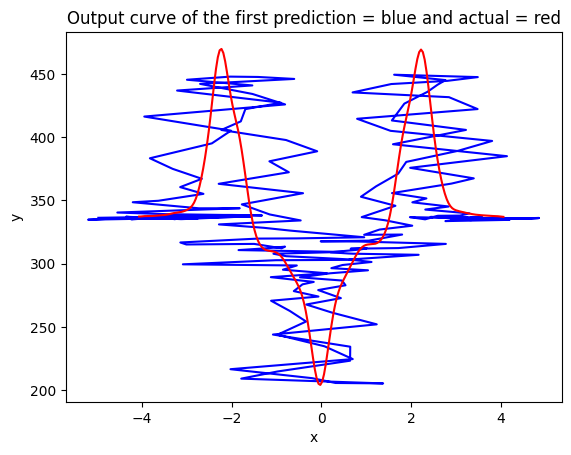

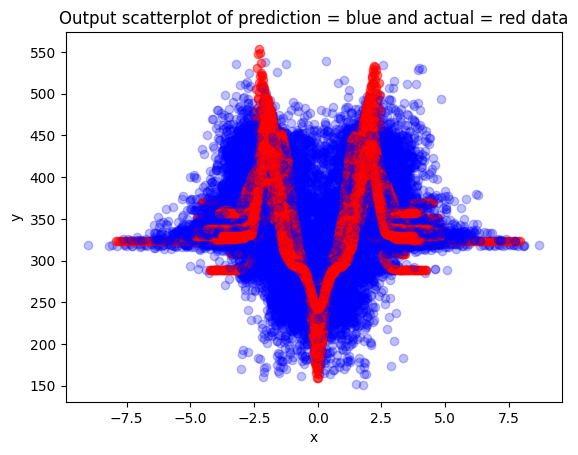

In [14]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


model.fit(train_input_values, train_output_values, batch_size=64, epochs=1250, validation_split=0.2)
print('')
print('MSE is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))